In [1]:
import matplotlib.pyplot as plt
from functions.func_flights_df_module import flights_processing
import os

In [2]:
# generating DataFrame with flights logs
df = flights_processing(os.getcwd() + r'\functions\related_archives\VRA_2023_12.csv')

### Checking bloxspot graphs to observe outliers

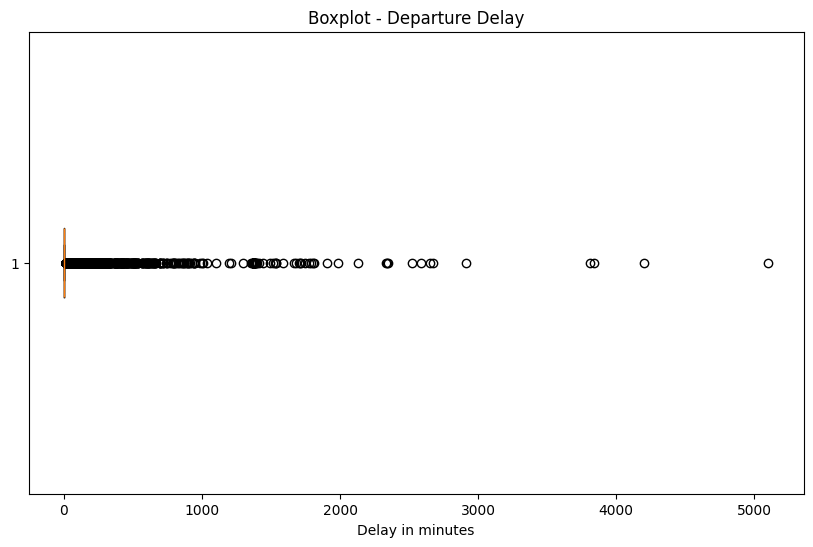

In [3]:
# Departure delay Boxplot to check outliers
plt.figure(figsize=(10, 6)) # size
plt.boxplot(df['departure_delay_time'].dropna(), vert=False) #column used
plt.title('Boxplot - Departure Delay') # tittle
plt.xlabel('Delay in minutes') # X axis label
plt.show()

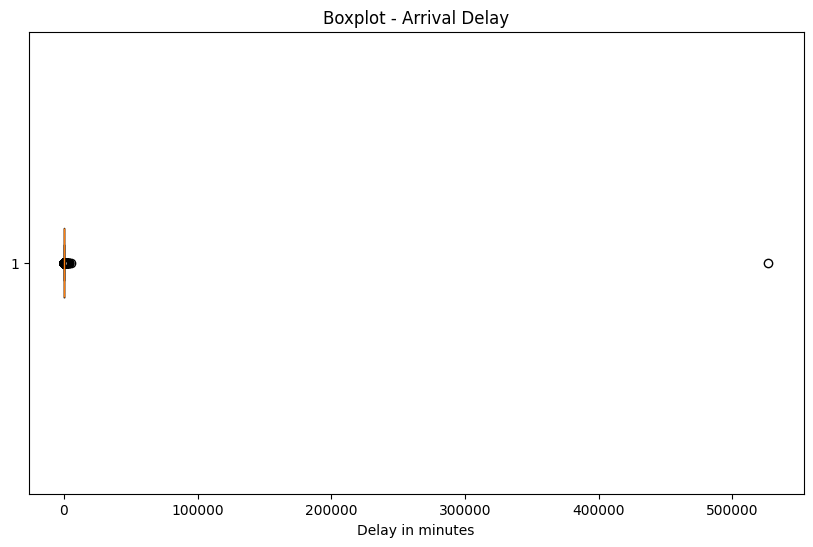

In [4]:
# Arrival delay Boxplot to check outliers
plt.figure(figsize=(10, 6)) # size
plt.boxplot(df['arrival_delay_time'].dropna(), vert=False) #column used
plt.title('Boxplot - Arrival Delay') #title
plt.xlabel('Delay in minutes') # X axis label
plt.show()

### Checking DataFrame number of rows

In [5]:
rows_before = len(df)
print(f'{rows_before} rows.')

75649 rows.


### Looking for these outliers

- using Interquartile Range "IQR" to find them:
Explanation: The Interquartile Range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (third quartile, Q3) and the 25th percentile (first quartile, Q1) of a data set. It is used to identify outliers in a dataset. Values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are typically considered outliers.

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Setting thresholds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from 'departure_delay_time' column
df = remove_outliers(df, 'departure_delay_time')

# Remove outliers from 'arrival_delay_time' column
df = remove_outliers(df, 'arrival_delay_time')

### Checking rows differences 

In [9]:
# number of rows before drop of outliers
print(f'{rows_before} rows.')

75649 rows.


In [7]:
# number of rows on DF after outliers cleasing
rows_after = len(df)
print(f'{rows_after} rows.')

56062 rows.


In [8]:
# number of rows droppeds
print(f'{rows_before - rows_after} droppeds as outliers')

19587 droppeds as outliers


### Checking the bloxspots graphs again

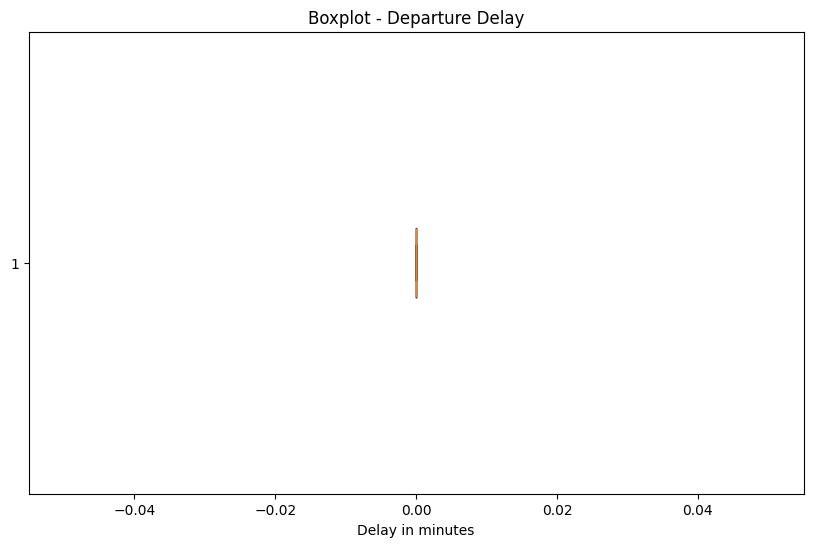

In [10]:
# Departure delay Boxplot to check outliers
plt.figure(figsize=(10, 6)) # size
plt.boxplot(df['departure_delay_time'].dropna(), vert=False) #column used
plt.title('Boxplot - Departure Delay') # tittle
plt.xlabel('Delay in minutes') # X axis label
plt.show()

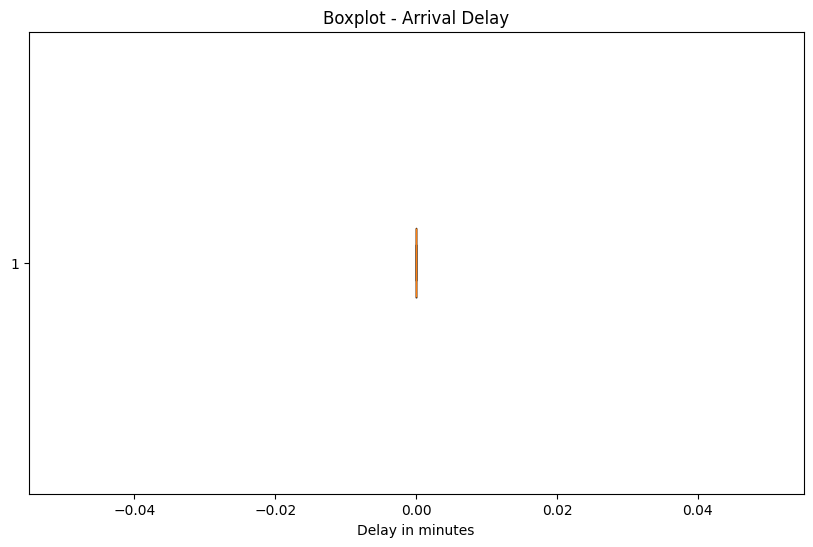

In [11]:
# Arrival delay Boxplot to check outliers
plt.figure(figsize=(10, 6)) # size
plt.boxplot(df['arrival_delay_time'].dropna(), vert=False) #column used
plt.title('Boxplot - Arrival Delay') #title
plt.xlabel('Delay in minutes') # X axis label
plt.show()

### Creating a csv from that DataFrame

In [14]:
# transform dataframe to csv and saves on main_related_archives folder

#getting path folder
path = os.getcwd() + r'\\main_related_archives'

#saving csv
df.to_csv(path + '\\flight_logs.csv', index=False)